Matriz A = [[0.99168 1.     ]
 [0.00832 0.     ]]
Valores propios de A son = [ 1.      -0.00832]
Vectores propios de A son = [[ 0.99996539 -0.70710678]
 [ 0.00831971  0.70710678]]
1.0
-0.00832000000000005


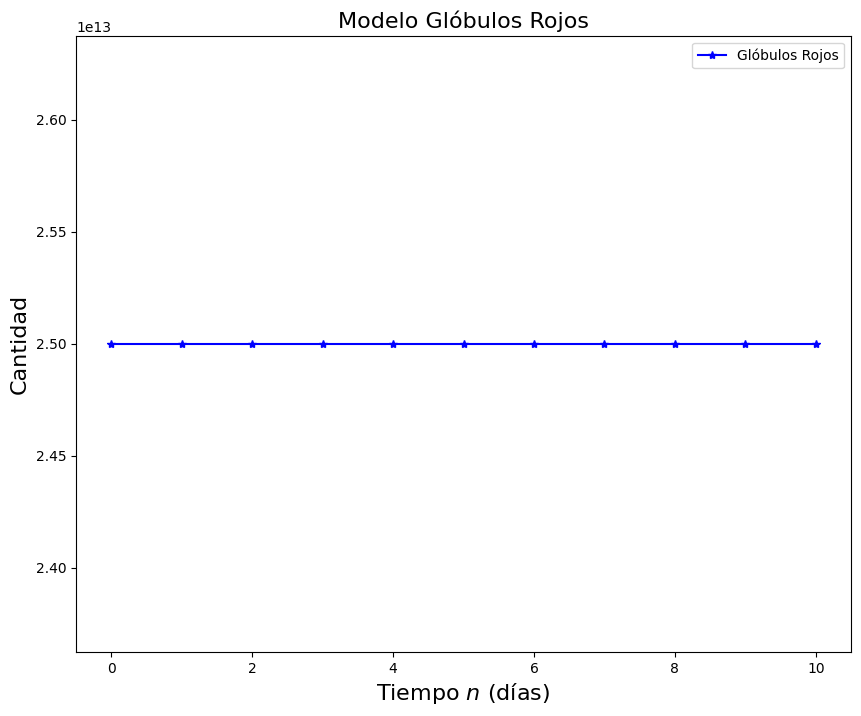

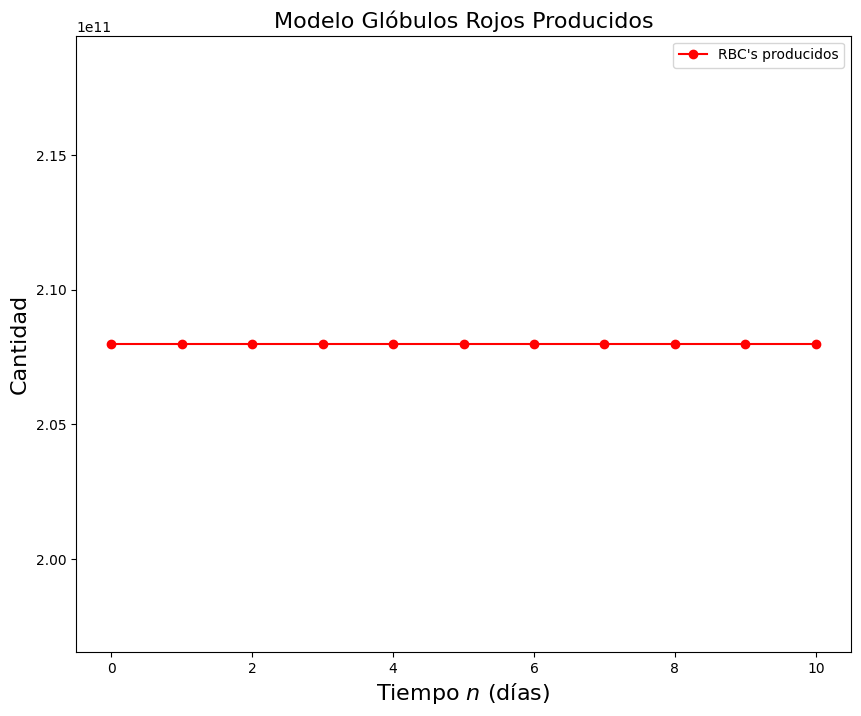

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

##MODELO BASE - CASO GAMMA = 1

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 1
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    y[i] = res[1]


fig, ax = plt.subplots(figsize=[10,8])
#plt.axis([0,10,0,1]) 
plt.plot(n, x, color='blue',marker='*',label='Glóbulos Rojos') # GlobRoj
plt.legend()
plt.title('Modelo Glóbulos Rojos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')
#ax1.text(5, 0.2, r'$a = {}$'.format(a), fontsize=15)
fig, ax = plt.subplots(figsize=[10,8])
plt.plot(n, y, color='red',marker='o',label='RBC\'s producidos') # CMH
plt.legend()
plt.title('Modelo Glóbulos Rojos Producidos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print(solucion1)
print(solucion2)


Matriz A = [[0.99168  1.      ]
 [0.005824 0.      ]]
Valores propios de A son = [ 0.99751849 -0.00583849]
Vectores propios de A son = [[ 0.99998296 -0.70798467]
 [ 0.00583839  0.7062278 ]]
0.9975184882771035
-0.005838488277103593


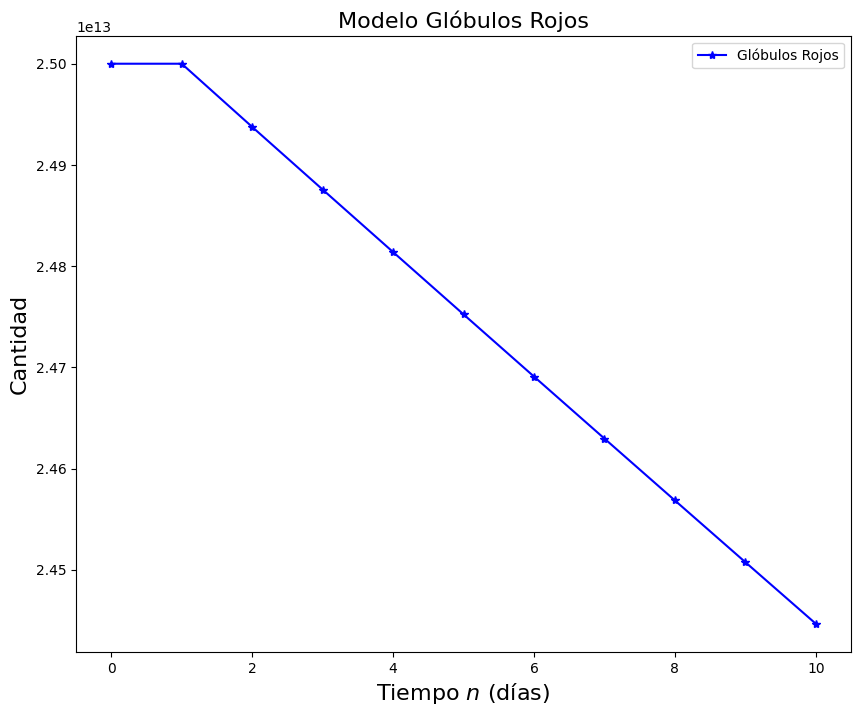

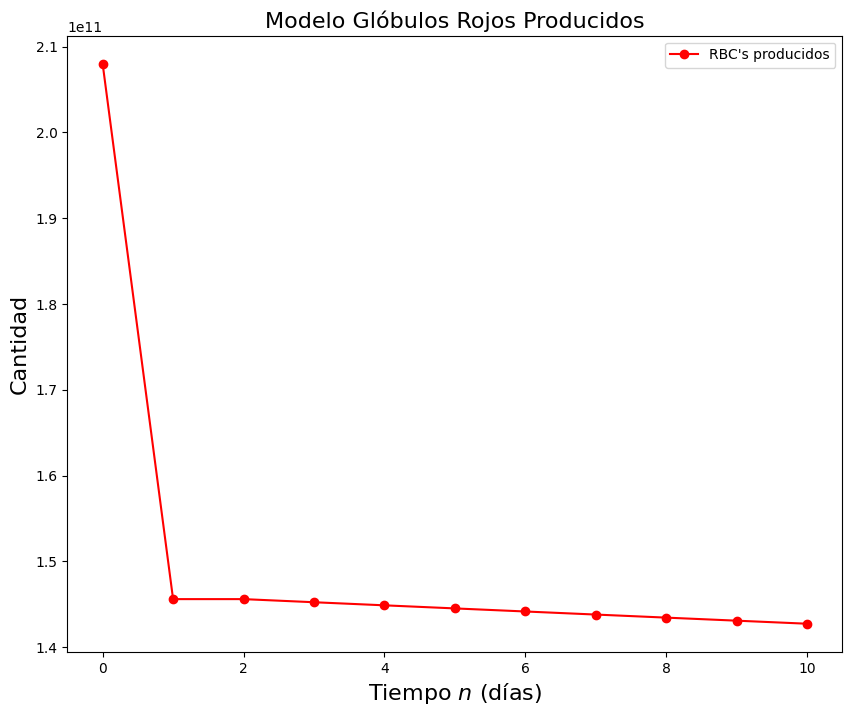

In [7]:
##MODELO BASE - CASO GAMMA = 0.7

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 0.7
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    y[i] = res[1]


fig, ax = plt.subplots(figsize=[10,8])
#plt.axis([0,10,0,1]) 
plt.plot(n, x, color='blue',marker='*',label='Glóbulos Rojos') # GlobRoj
plt.legend()
plt.title('Modelo Glóbulos Rojos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')
#ax1.text(5, 0.2, r'$a = {}$'.format(a), fontsize=15)
fig, ax = plt.subplots(figsize=[10,8])
plt.plot(n, y, color='red',marker='o',label='RBC\'s producidos') # CMH
plt.legend()
plt.title('Modelo Glóbulos Rojos Producidos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print(solucion1)
print(solucion2)

Matriz A = [[0.99168  1.      ]
 [0.010816 0.      ]]
Valores propios de A son = [ 1.00246936 -0.01078936]
Vectores propios de A son = [[ 0.9999418  -0.70623427]
 [ 0.01078873  0.70797822]]
1.0024693572228123
-0.010789357222812324


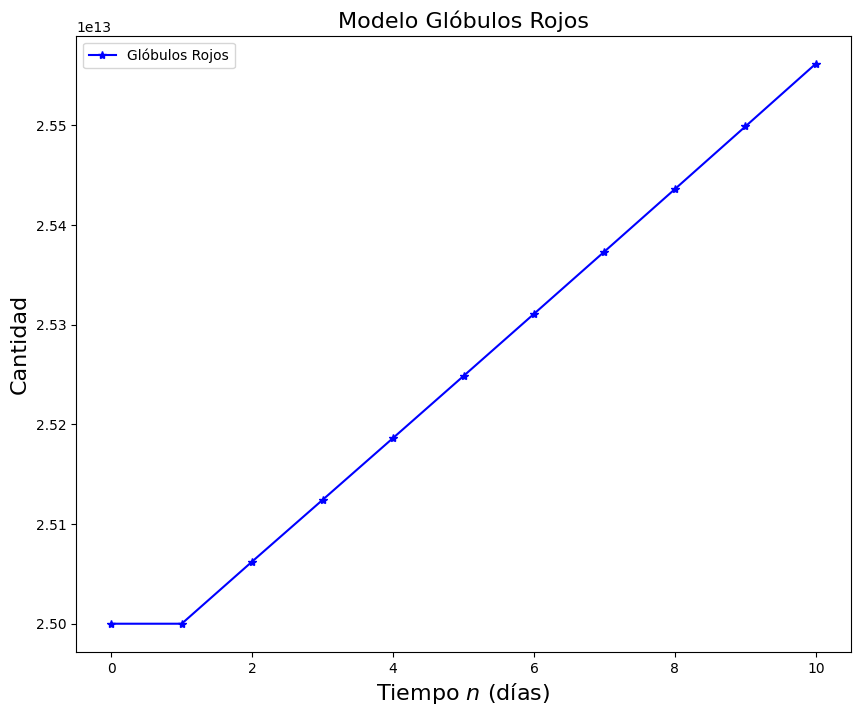

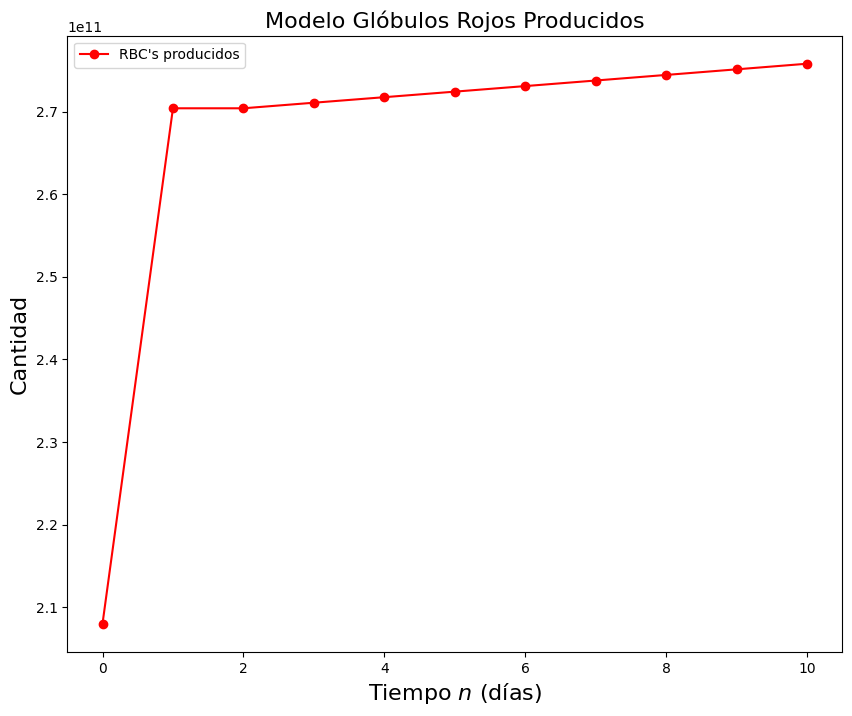

In [8]:
##MODELO BASE - CASO GAMMA = 1.3

##Constantes
x0 = 25*(10**(12))
y0 = 208*(10**(9))
gamma = 1.3
f = 0.00832


#Valores Propios Matriz
A = np.array([[(1-f), 1], [gamma*f, 0]])
w,v = eig(A)
print('Matriz A =', A)
print('Valores propios de A son =', w)
print('Vectores propios de A son =', v)

##Arreglo de días
N = 10
n = np.linspace(0,N,N+1) # lista de 0 a N (N+1 elementos)

##Función de cambio

def fun(x,y):
    gr = (1-f)*x+y
    cm = gamma*f*x
    return [gr,cm]

x = np.zeros(N+1)
y = np.zeros(N+1)
x[0]=x0
y[0]=y0
for i in range(1,N+1):
    res = fun(x[i-1],y[i-1])
    x[i] = res[0]
    y[i] = res[1]


fig, ax = plt.subplots(figsize=[10,8])
#plt.axis([0,10,0,1]) 
plt.plot(n, x, color='blue',marker='*',label='Glóbulos Rojos') # GlobRoj
plt.legend()
plt.title('Modelo Glóbulos Rojos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')
#ax1.text(5, 0.2, r'$a = {}$'.format(a), fontsize=15)
fig, ax = plt.subplots(figsize=[10,8])
plt.plot(n, y, color='red',marker='o',label='RBC\'s producidos') # CMH
plt.legend()
plt.title('Modelo Glóbulos Rojos Producidos',fontsize='16')
plt.xlabel('Tiempo $n$ (días)',fontsize='16')
plt.ylabel('Cantidad',fontsize='16')

solucion1 = ((1-f)+ np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
solucion2 = ((1-f)- np.sqrt((1-f)*(1-f)+4*(f)*gamma))/2
print(solucion1)
print(solucion2)